## Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib  for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
sns.set(font_scale = 1.5)
sns.set_style('ticks')
sns.set()

## Load Cleaned Data

In [2]:
df = pd.read_csv('../data/data_2014_to_2017.csv')
df.head()

,Record,Location,X,Y,Date,Time,Environment,Road_Surface,Traffic_Control,Collision_Location,Light,Collision_Classification,Impact_type,Year,Month,Week_day
0,1,RIDEAU ST @ WALLER ST,368282.69327,5.032275e+06,2014-02-21,06:07:00,02 - Rain,02 - Wet,01 - Traffic signal,03 - At intersection,07 - Dark,01 - Fatal injury,07 - SMV other,2014,February,Friday
1,2,HINES RD btwn INNOVATION DR & SOLANDT RD,350172.08885,5.022740e+06,2014-08-02,13:55:00,01 - Clear,01 - Dry,10 - No control,04 - At/near private drive,01 - Daylight,01 - Fatal injury,02 - Angle,2014,August,Saturday
2,3,LOGGERS WAY btwn KINGDON MINE RD & GALETTA SID...,324590.14097,5.033218e+06,2014-06-20,23:15:00,01 - Clear,01 - Dry,10 - No control,01 - Non intersection,07 - Dark,01 - Fatal injury,07 - SMV other,2014,June,Friday
3,4,MONTREAL RD @ BATHGATE DR/BURMA RD,373224.24847,5.034518e+06,2014-07-29,16:31:00,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,01 - Daylight,01 - Fatal injury,05 - Turning movement,2014,July,Tuesday
4,5,RICHMOND RD btwn FALLOWFIELD RD & RUSHMORE RD,358156.20481,5.012570e+06,2014-08-05,20:05:00,01 - Clear,01 - Dry,10 - No control,01 - Non intersection,05 - Dusk,01 - Fatal injury,07 - SMV other,2014,August,Tuesday


In [3]:
df.shape

(58338, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58338 entries, 0 to 58337
Data columns (total 16 columns):
Record                      58338 non-null int64
Location                    58338 non-null object
X                           58338 non-null float64
Y                           58338 non-null float64
Date                        58338 non-null object
Time                        58338 non-null object
Environment                 58337 non-null object
Road_Surface                58338 non-null object
Traffic_Control             58302 non-null object
Collision_Location          58332 non-null object
Light                       58336 non-null object
Collision_Classification    58338 non-null object
Impact_type                 58338 non-null object
Year                        58338 non-null int64
Month                       58338 non-null object
Week_day                    58338 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 7.1+ MB


Observation

- There are three numerical  and 9 categorical attributes in the dataset

- Few attributes such as Traffic_Control, Collision_Location, and Light have missing values. We will come back to the missing values later in data preprocessing.

## Class Distribution

In [5]:
df.Collision_Classification.value_counts()

03 - P.D. only           47248
02 - Non-fatal injury    10991
01 - Fatal injury           99
Name: Collision_Classification, dtype: int64

## Categorical Attributes

Let's take a look at the categorical attributes

In [6]:
# Counts of the new column
df.Week_day.value_counts()

Friday       10067
Thursday      9851
Wednesday     9366
Tuesday       9158
Monday        7890
Saturday      6688
Sunday        5318
Name: Week_day, dtype: int64

Observation

- Most transportation collisions occur on Fridays. This might be due to the start of weekend as most people would like to have fun


In [7]:
# Count of the Road Surface attribute
df.Road_Surface.value_counts()

01 - Dry                     38362
02 - Wet                     10123
03 - Loose snow               3844
06 - Ice                      2650
04 - Slush                    1760
05 - Packed snow              1443
08 - Loose sand or gravel       56
00 - Unknown                    50
99 - Other                      41
07 - Mud                         5
09 - Spilled liquid              4
Name: Road_Surface, dtype: int64

Observations

- Most transportation collisions occur when the road surface is dry

- Road surfaces with Spilled liquid are less frequent causes of transportation collisions 

- The less frequently occuring subsets will be dealt with later in data preprocessing



In [8]:
# Count of the Traffic control attribute
df.Traffic_Control.value_counts()

10 - No control            27966
01 - Traffic signal        23314
02 - Stop sign              6099
11 - Roundabout              526
03 - Yield sign              370
08 - Traffic gate             15
09 - Traffic controller        9
07 - School bus                2
04 - Ped. crossover            1
Name: Traffic_Control, dtype: int64

Observations

- Most transportation collisions occur when there is no traffic control

- Pedestrain crossover is the least cause of transportation collisions 



In [9]:
# Count of the Collision location attribute
df.Collision_Location.value_counts()

01 - Non intersection         22114
02 - Intersection related     18280
03 - At intersection          12523
04 - At/near private drive     5105
07 - Overpass or bridge         240
05 - At railway crossing         37
06 - Underpass or tunnel         29
98 - Other                        3
99 - Other                        1
Name: Collision_Location, dtype: int64

Observations

- Most transportation collisions occur when there is no intersection



In [10]:
# Count of the Light attribute
df.Light.value_counts()

01 - Daylight                39879
07 - Dark                    13237
05 - Dusk                     2609
03 - Dawn                     1354
00 - Unknown                  1163
08 - Dark, artificial           73
99 - Other                      11
04 - Dawn, artificial            6
06 - Dusk, artificial            3
02 - Daylight, artificial        1
Name: Light, dtype: int64

Observations

- Most transportation collisions occur at Daylight


In [11]:
# Count of the Impact type attribute
df.Impact_type.value_counts()

03 - Rear end                  19735
07 - SMV other                  9661
02 - Angle                      7985
04 - Sideswipe                  7691
05 - Turning movement           6233
06 - SMV unattended vehicle     4717
99 - Other                      1456
01 - Approaching                 860
Name: Impact_type, dtype: int64

Observation

- Most transportation collisions impact type occur  at rear end of the vehicle, which is the reason why non-fatal accident class is the majority class




In [12]:
df.Environment.value_counts()

01 - Clear                     45929
03 - Snow                       5664
02 - Rain                       5433
04 - Freezing Rain               672
05 - Drifting Snow               304
07 - Fog, mist, smoke, dust      164
06 - Strong wind                  86
00 - Unknown                      67
99 - Other                        18
Name: Environment, dtype: int64

Observation

- Interestingly, most transportation collisions occur when the environment is clear, which is contrary to the naive belief that most collisions would occur when the environment is messy

## Statistical Description

Having looked at the categorical attributes, let's now take a look at the few numerical attributes in the dataset

In [13]:
# Statistical description of numerical attributes
df.describe()

,Record,X,Y,Year
count,58338.000000,5.833800e+04,5.833800e+04,58338.000000
mean,7298.423292,3.672310e+05,5.026143e+06,2015.479413
std,4219.998366,2.149034e+04,7.493467e+03,1.118896
min,1.000000,3.176661e+05,4.981006e+06,2014.000000
25%,3647.000000,3.633175e+05,5.022008e+06,2014.000000
50%,7293.000000,3.678702e+05,5.027459e+06,2015.000000
75%,10939.000000,3.720070e+05,5.031420e+06,2016.000000
max,15078.000000,5.019474e+06,5.043440e+06,2017.000000


# Exporatory Data Analysis

We first look at the pair plot of numerical attributes

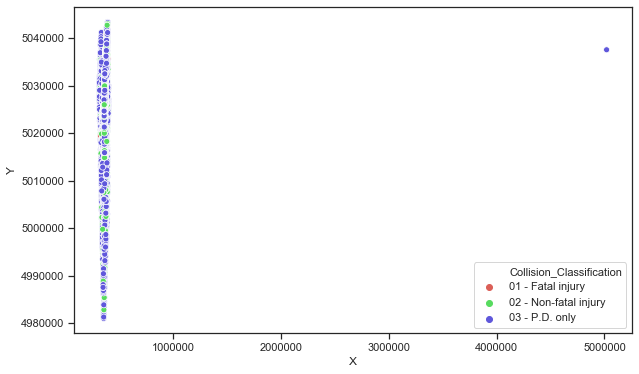

In [14]:
sns.set(font_scale = 1)
sns.set_style('ticks')
plt.figure(figsize = (10,6))

# Plot
sns.scatterplot(data = df, x = 'X', y = 'Y', hue = 'Collision_Classification', 
                palette="hls")

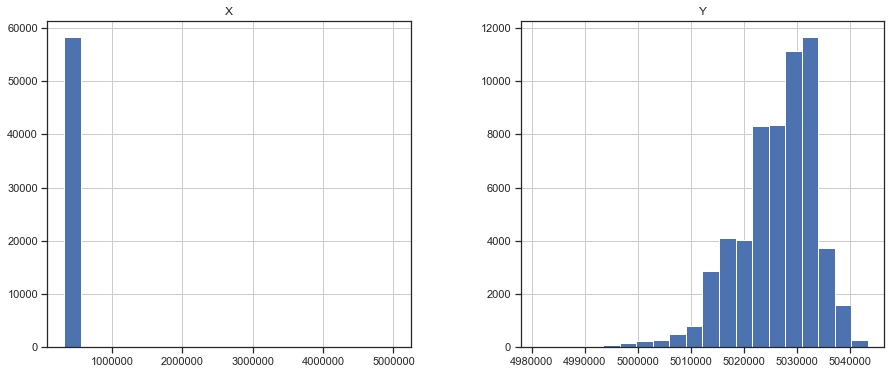

In [22]:
df[['X','Y']].hist(bins = 20, figsize = (15,6))

We can see that the X attribute contains extreme outliers larger than three times the standard deviation and the Y attribute is left skewed but has no outliers

## Clean Up Extreme Outliers: Tukey IQR

In [23]:
# Calculate first and third quartile
QR_1st = df['X'].describe()['25%']
QR_3rd = df['X'].describe()['75%']

# Interquartile range
IQR = QR_3rd - QR_1st

# Lower and upper bounds
lower_bound = QR_1st - 3*IQR
upper_bound = QR_3rd + 3*IQR

# Remove outliers in the X attribute
df['X'] =  df['X'][(df['X'] > lower_bound)&(df['X'] < upper_bound)] 

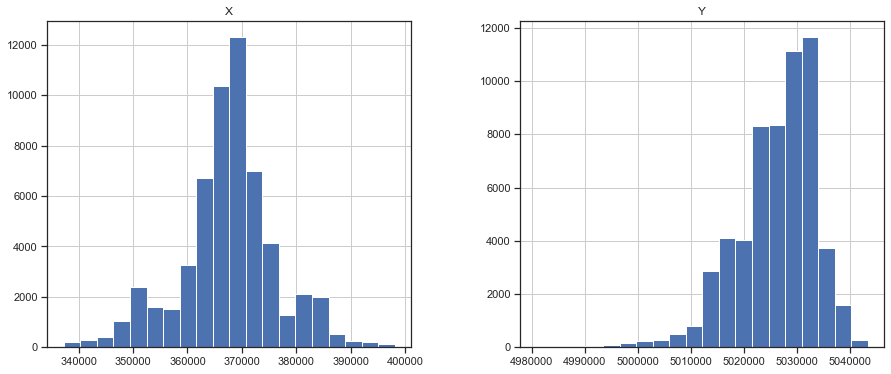

In [25]:
# Plot the histogram of the numerical values
df[['X','Y']].hist(bins = 20, figsize = (15,6))

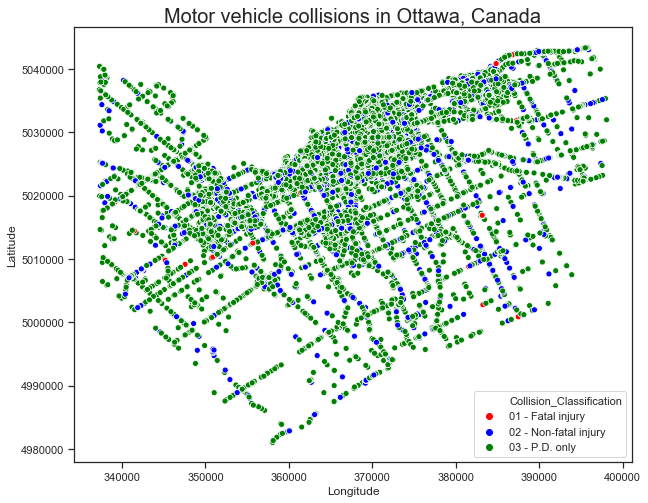

In [26]:
sns.set(font_scale = 1)
sns.set_style('ticks')
plt.figure(figsize = (10,8))

# Plot
sns.scatterplot(data = df, x = 'X', y = 'Y', hue = 'Collision_Classification', 
                palette = ['red', 'blue', 'green'])
plt.title('Motor vehicle collisions in Ottawa, Canada', fontsize = 20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('../image/map.png')

- The X vs. Y plot shows the map of Ottawa Canada

- Due to class imbalance, the fatal injury class is rarely seen in the map

In [27]:
# Save data
df.to_csv('../data/cleaned_data_2014_to_2017.csv', index =False)

## C. Box Plots

Let's look at the box plots

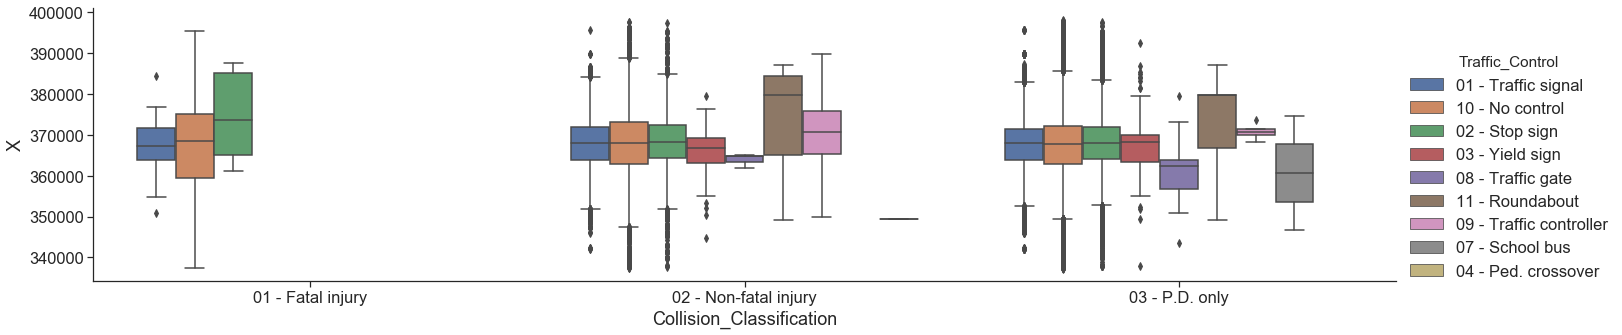

In [39]:
# Make count plot of impact type
sns.catplot(x = 'Collision_Classification', y = 'X', data = df, kind = 'box', aspect = 4.0, 
               height = 5, hue = 'Traffic_Control')

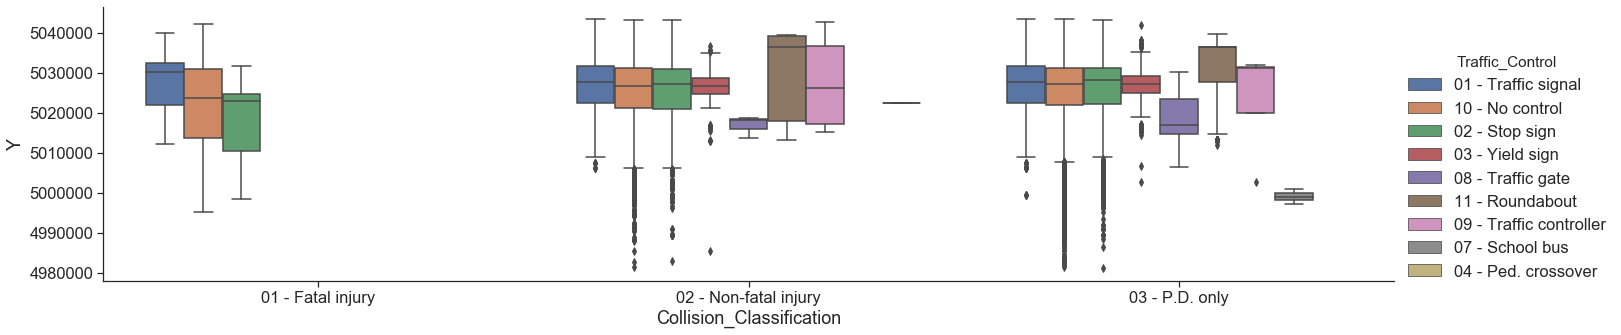

In [40]:
# Make count plot of impact type
sns.catplot(x = 'Collision_Classification', y = 'Y', data = df, kind = 'box', aspect = 4.0, 
               height = 5, hue = 'Traffic_Control')

- There are no more extreme outliers in the numerical attributes